<a href="https://colab.research.google.com/github/felipesora/CP2-Generative-AI/blob/main/CP2_Visao_Computacional_Corrigido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Checkpoint 02: Redes Neurais Com Keras**

Felipe Ulson Sora - RM555462

## **PARTE 2 – Visão Computacional**

### **Instalar dependências**

In [ ]:
!pip install ultralytics transformers pillow torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.8 MB/s eta 0:00:00


### **Usar o modelo do Hugging Face**

O modelo usado é o `google/vit-base-patch16-224`

Link: https://huggingface.co/google/vit-base-patch16-224

In [ ]:
from transformers import pipeline
from PIL import Image

# Cria o pipeline de classificação de imagens
classifier = pipeline("image-classification", model="google/vit-base-patch16-224")

# Abre a imagem
img = Image.open("gato02.jpg")  # coloque o nome da sua imagem

# Classifica
preds = classifier(img)

# Mostra as 3 classes mais prováveis
for p in preds[:3]:
    print(p)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cuda:0


{'label': 'Egyptian cat', 'score': 0.2539230287075043}
{'label': 'tabby, tabby cat', 'score': 0.04712283983826637}
{'label': 'tiger cat', 'score': 0.04623951017856598}


### **Usar o modelo YOLOv8 para detecção**


image 1/1 /content/gato02.jpg: 480x640 1 cat, 7.4ms
Speed: 2.2ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


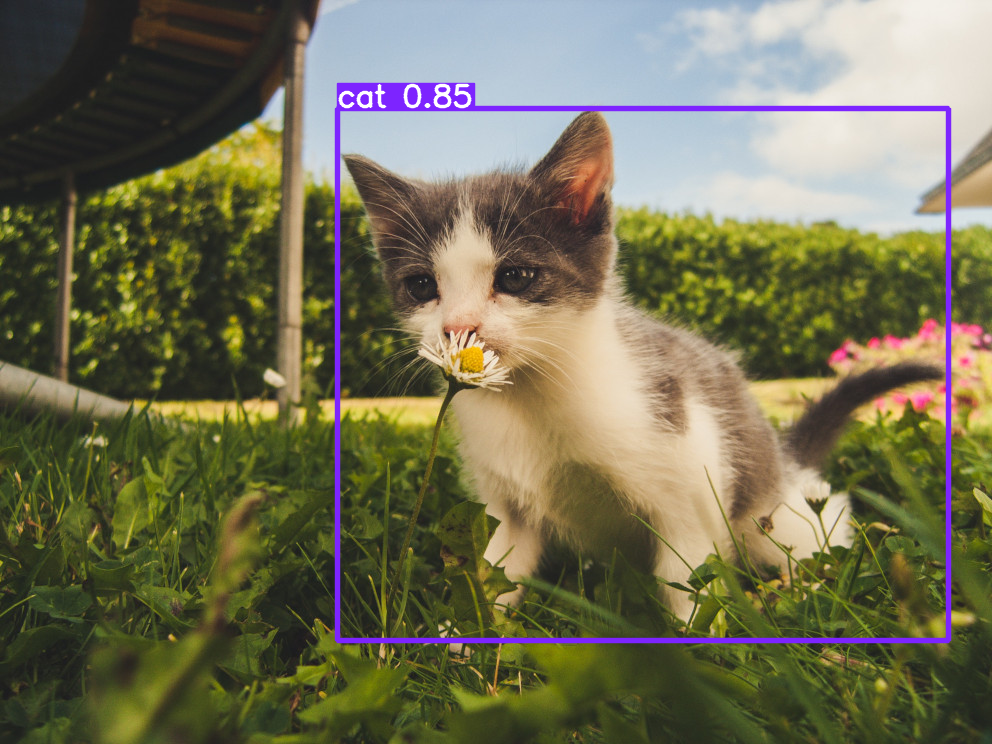

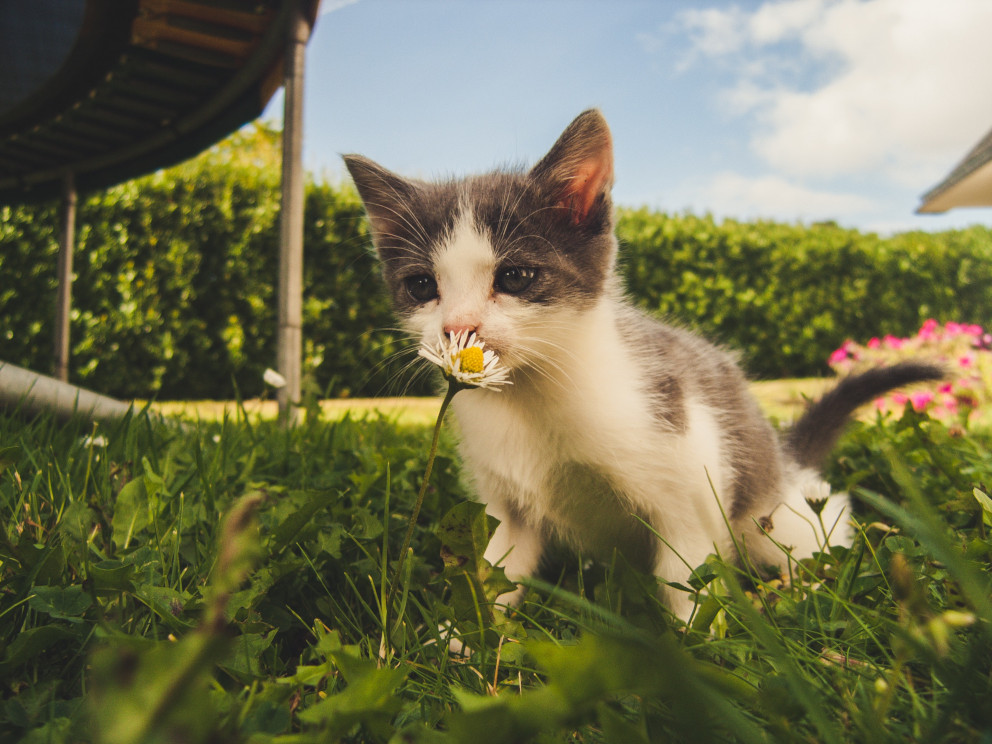

In [ ]:
from ultralytics import YOLO
from IPython.display import Image as IPImage, display

# Carrega o modelo pré-treinado
model = YOLO('yolov8n.pt')

# Faz a detecção na imagem
results = model('gato02.jpg')

# results é uma lista, pegamos o primeiro resultado
results[0].show()

# Exibe a imagem original (opcional)
display(IPImage(filename='gato02.jpg'))


### **Repetir para várias imagens**


📸 Imagem: gato02.jpg
Hugging Face: {'label': 'Egyptian cat', 'score': 0.2539230287075043}

image 1/1 /content/gato02.jpg: 480x640 1 cat, 8.9ms
Speed: 3.3ms preprocess, 8.9ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


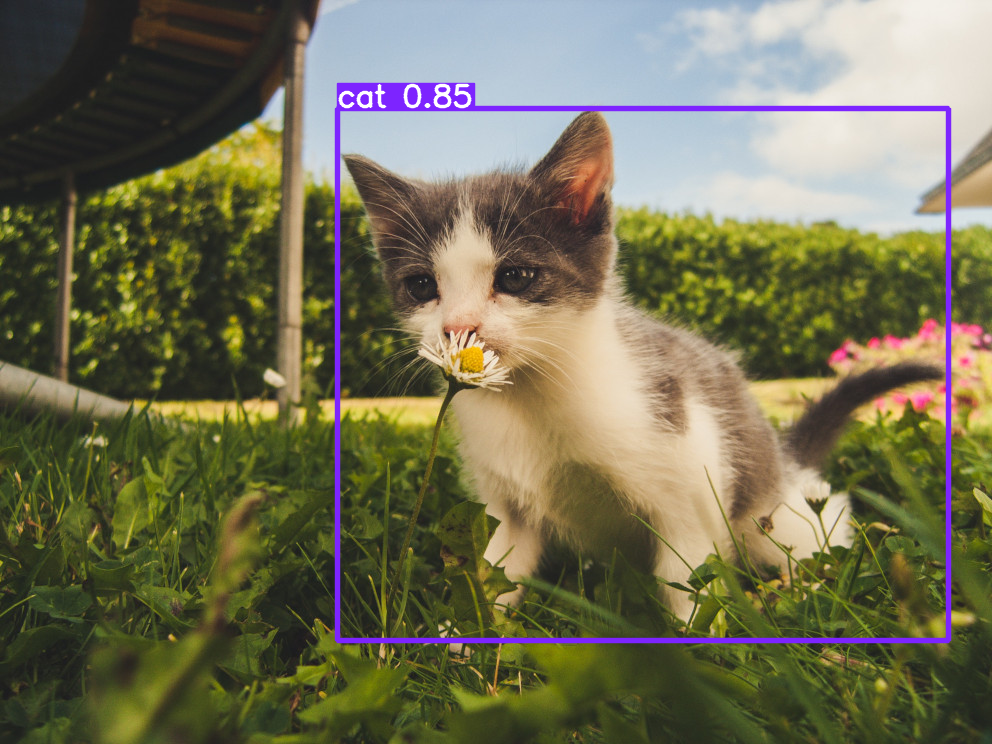

YOLO: cat (0.85)

📸 Imagem: cachorros.jpg
Hugging Face: {'label': 'kelpie', 'score': 0.4846331775188446}

image 1/1 /content/cachorros.jpg: 448x640 3 dogs, 9.6ms
Speed: 3.1ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


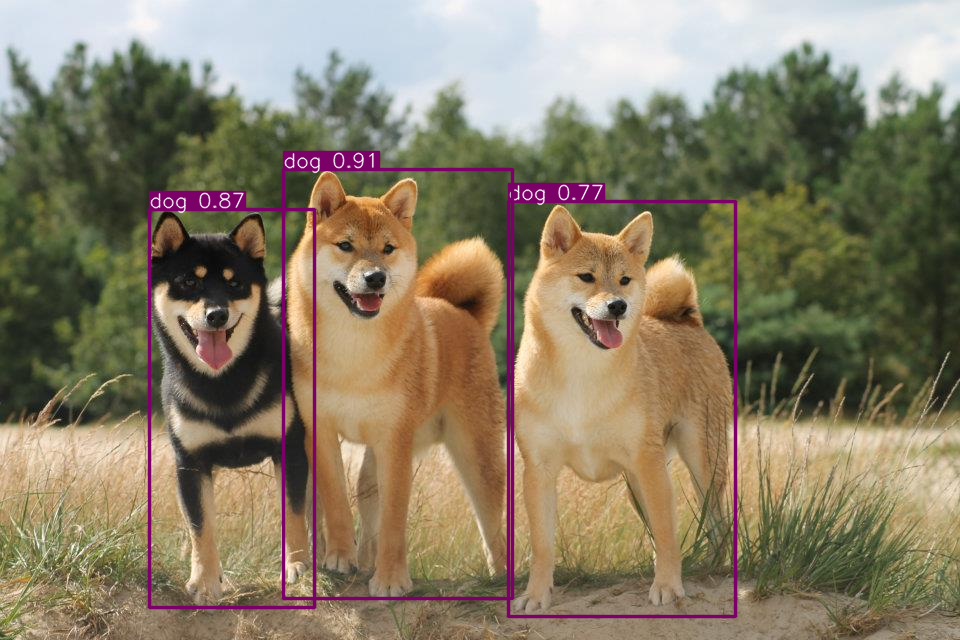

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


YOLO: dog (0.91)
YOLO: dog (0.87)
YOLO: dog (0.77)

📸 Imagem: cachorro_gato.jpg
Hugging Face: {'label': 'redbone', 'score': 0.7837561368942261}

image 1/1 /content/cachorro_gato.jpg: 480x640 1 cat, 1 dog, 13.6ms
Speed: 4.7ms preprocess, 13.6ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


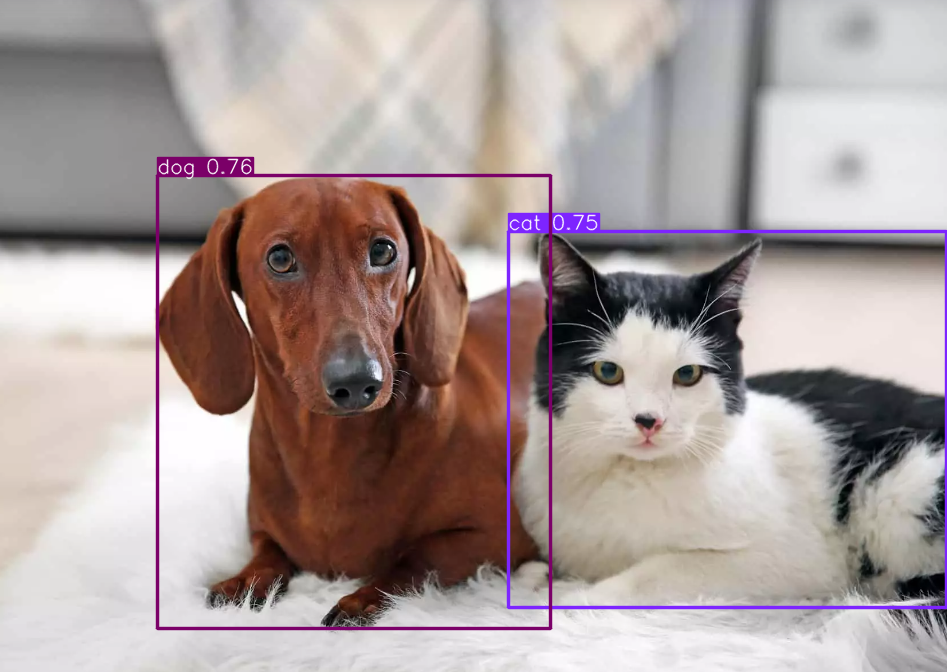

YOLO: dog (0.76)
YOLO: cat (0.75)


In [ ]:
import cv2
from PIL import Image
from IPython.display import display

imagens = ["gato02.jpg", "cachorros.jpg", "cachorro_gato.jpg"]

for img in imagens:
    print(f"\n📸 Imagem: {img}")

    # Hugging Face
    image = Image.open(img)
    preds = classifier(image)
    print("Hugging Face:", preds[0])

    # YOLOv8
    results = model(img)

    # Mostrar a imagem com caixas desenhadas
    annotated_frame = results[0].plot()  # desenha caixas
    annotated_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(annotated_frame))

    # Informações detalhadas no console
    for box in results[0].boxes:
        cls = model.names[int(box.cls)]
        conf = float(box.conf)
        print(f"YOLO: {cls} ({conf:.2f})")
